In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

load dataset

In [2]:
iris1 = datasets.load_iris()
iris=pd.DataFrame(iris1.data, columns=iris1.feature_names)
iris['target']=iris1.target
iris=iris[iris.target>0]

In [3]:
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
sepal length (cm)    100 non-null float64
sepal width (cm)     100 non-null float64
petal length (cm)    100 non-null float64
petal width (cm)     100 non-null float64
target               100 non-null int32
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


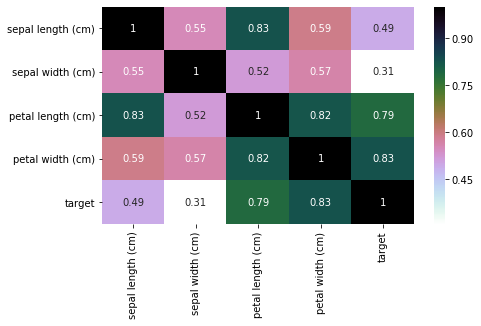

In [5]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [6]:
train_X, test_X, train_y, test_y=train_test_split(iris.drop('target',axis=1), 
                                                  iris.target, test_size=0.2, random_state=0)
model=LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('Accuracy of logistic regression is:', metrics.accuracy_score(prediction,test_y))

Accuracy of logistic regression is: 0.9


C:\Users\Dr. Saneeha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
model.coef_

array([[-1.60973626, -1.4964363 ,  2.43339804,  2.2274298 ]])

In [8]:
model.intercept_

array([-1.09895161])

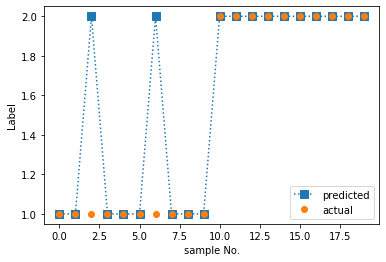

In [9]:
test_temp=np.argsort(test_y)
plt.plot(np.arange(len(prediction)),prediction[test_temp],':s', markersize=8,label='predicted')
plt.plot(np.arange(len(prediction)),test_y.iloc[test_temp],'o',label='actual')
plt.xlabel('sample No.')
plt.ylabel('Label')
plt.legend()
plt.show()

In [10]:
iris1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

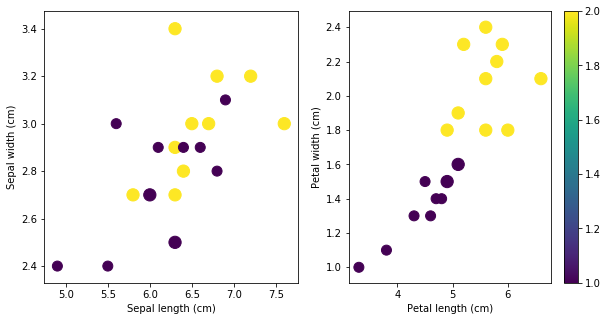

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(test_X.iloc[:,0],test_X.iloc[:,1],c=test_y, s=50*(prediction+1))
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.subplot(1,2,2)
plt.scatter(test_X.iloc[:,2],test_X.iloc[:,3],c=test_y, s=50*(prediction+1))
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.colorbar()
plt.show()

In [12]:
metrics.confusion_matrix(test_y,prediction)

array([[ 8,  2],
       [ 0, 10]], dtype=int64)

In [13]:
report=metrics.classification_report(test_y,prediction)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

